In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
titanic = pd.read_csv("Titanic_Survivor.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.shape

(891, 12)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic=titanic.drop('Cabin', axis=1)

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


C:\Users\hp\AppData\Local\Temp\ipykernel_24712\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

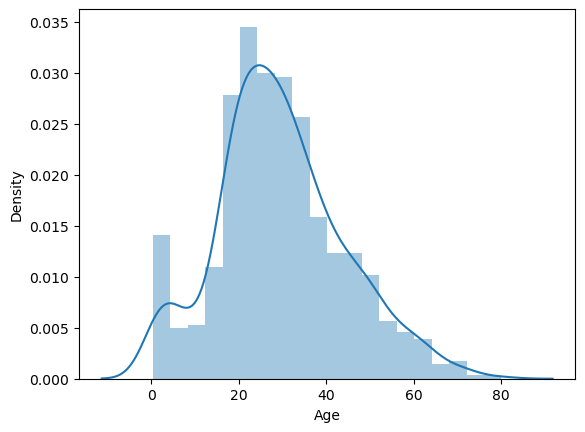

In [15]:
sns.distplot(titanic['Age'])

In [9]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\299619108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [11]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1.0


C:\Users\hp\AppData\Local\Temp\ipykernel_13608\1711784064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Embarked'])


<Axes: xlabel='Embarked', ylabel='Density'>

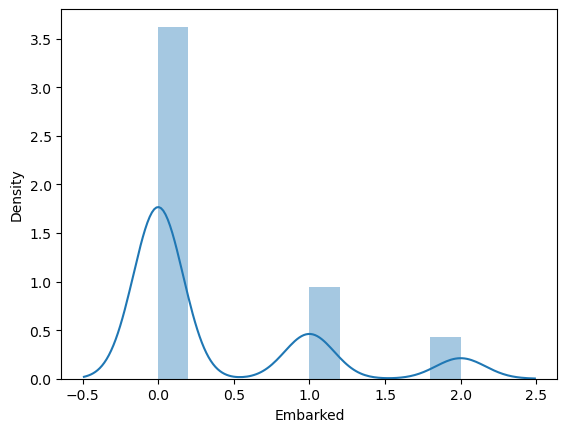

In [12]:
sns.distplot(titanic['Embarked'])

In [13]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\2855616432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)


In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\176353619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace= True)


In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

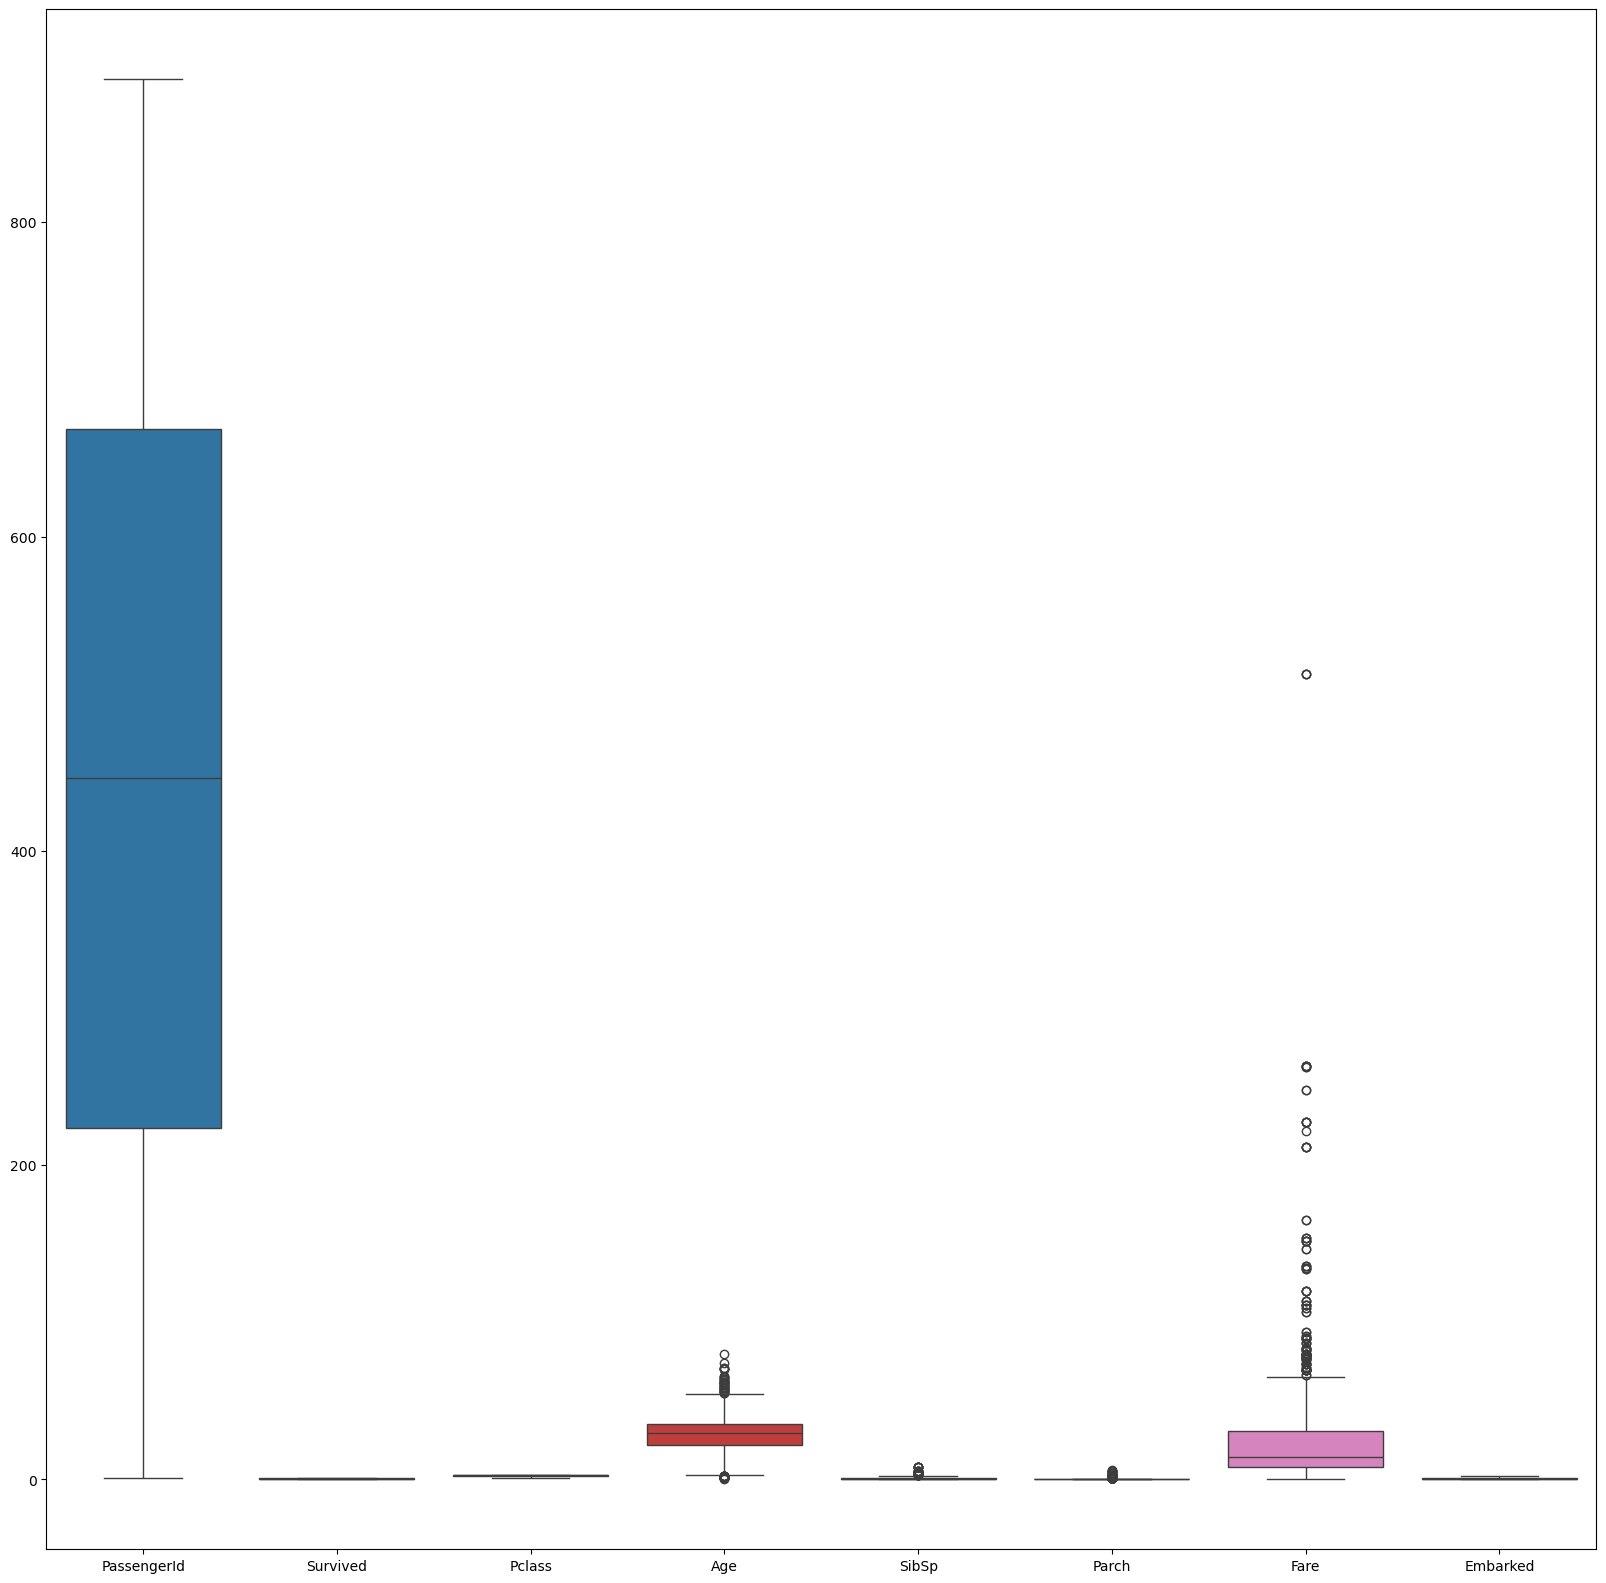

In [17]:
fig,ax= plt.subplots(figsize=(20,20))
sns.boxplot(titanic,ax=ax)

<Axes: >

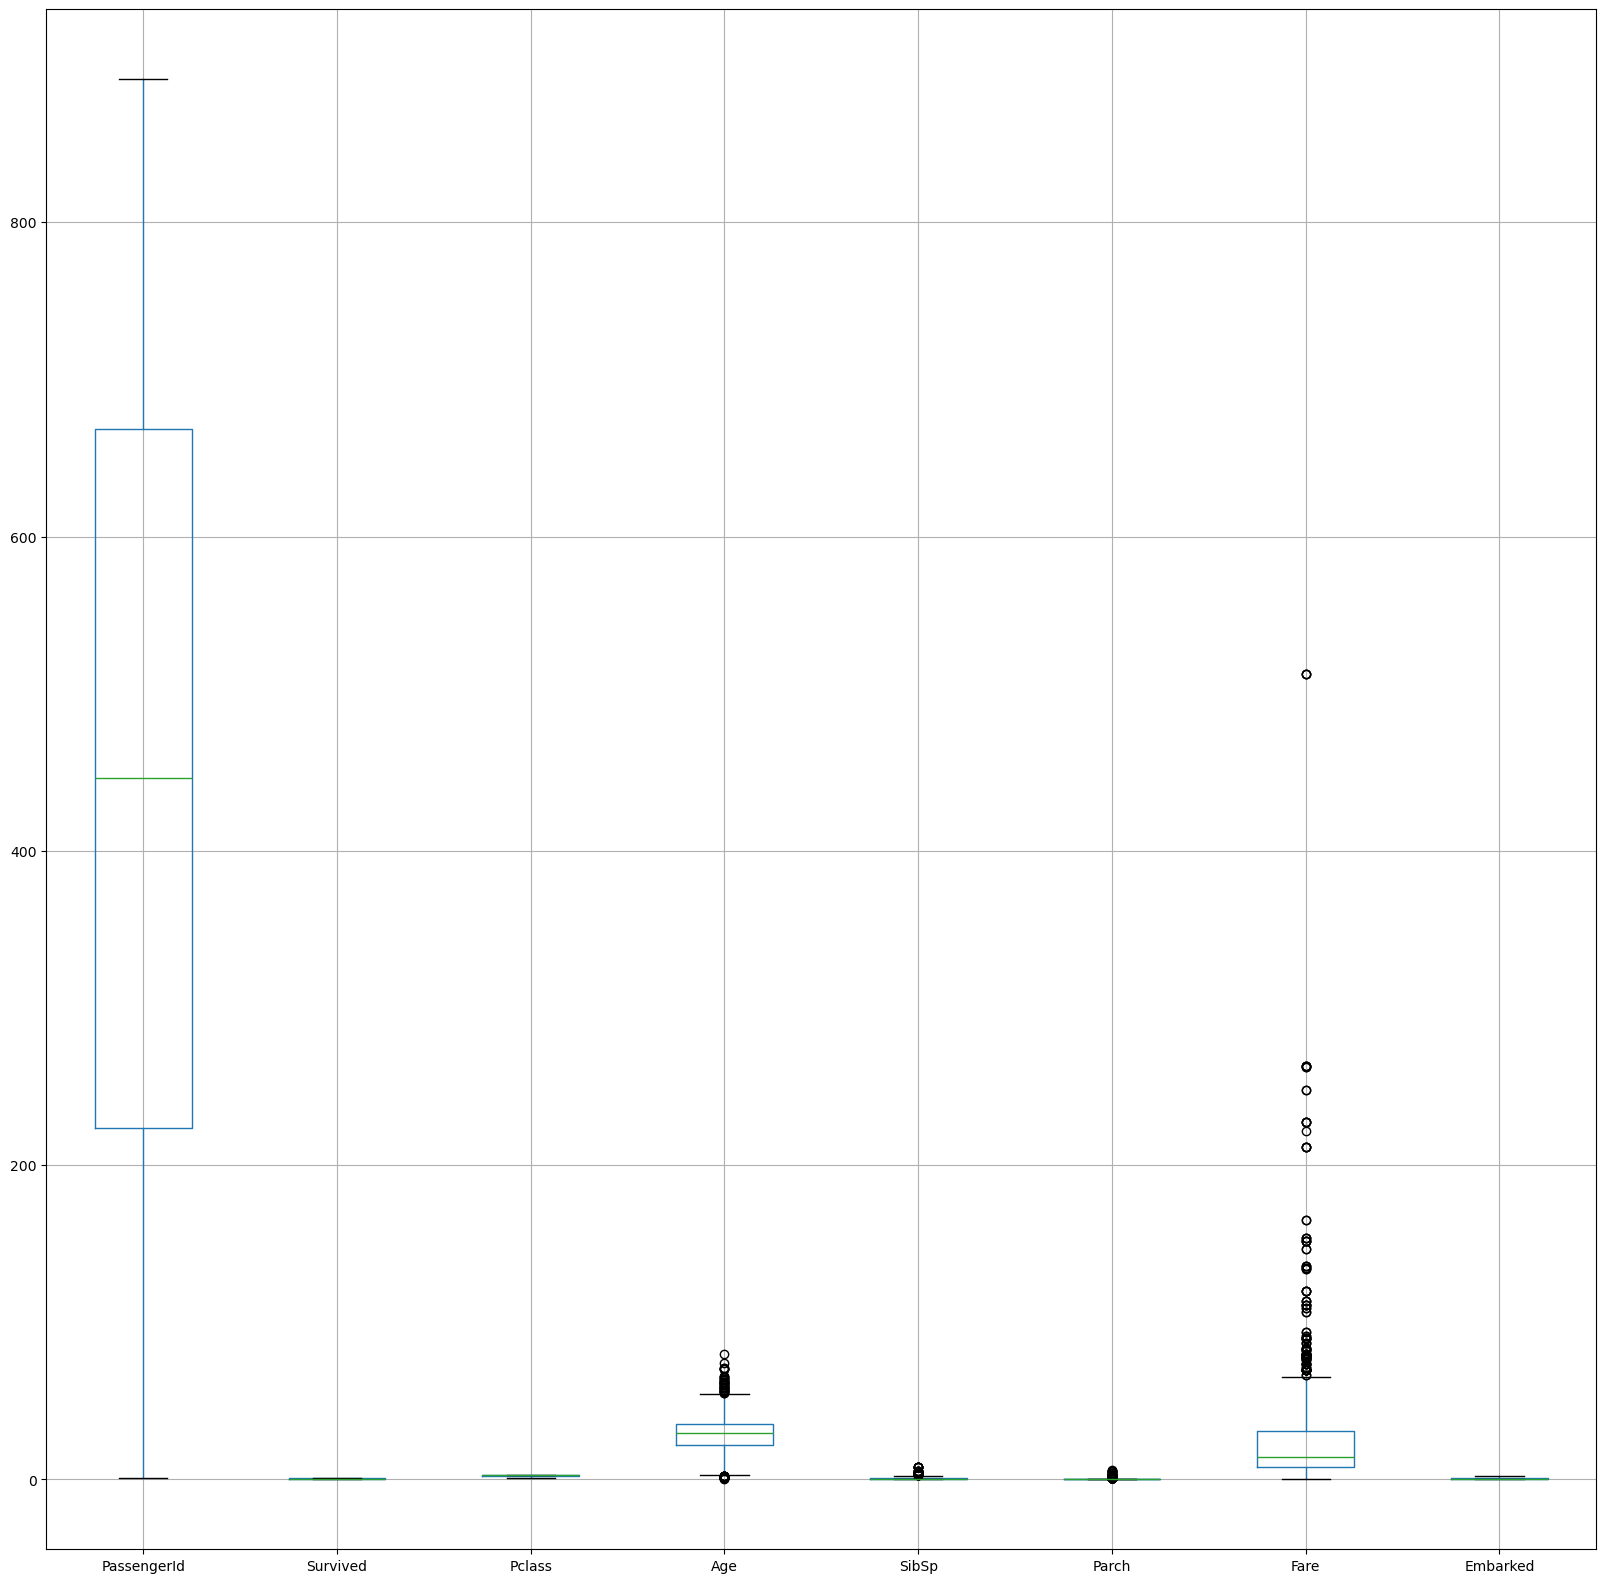

In [18]:
titanic.boxplot(figsize=(20,20))

In [19]:
titanic=titanic.drop('Ticket', axis=1)

In [20]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,1.0


In [21]:
titanic = titanic.drop('Name', axis=1)

In [22]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0.0
1,2,1,1,female,38.000000,1,0,71.2833,1.0
2,3,1,3,female,26.000000,0,0,7.9250,0.0
3,4,1,1,female,35.000000,1,0,53.1000,0.0
4,5,0,3,male,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0.0
887,888,1,1,female,19.000000,0,0,30.0000,0.0
888,889,0,3,female,29.699118,1,2,23.4500,0.0
889,890,1,1,male,26.000000,0,0,30.0000,1.0


In [23]:
titanic.replace({'Sex':{'male':0, 'female':1}},inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3324485722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0, 'female':1}},inplace= True)


In [24]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0.0
1,2,1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,3,1,26.000000,0,0,7.9250,0.0
3,4,1,1,1,35.000000,1,0,53.1000,0.0
4,5,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0.0
887,888,1,1,1,19.000000,0,0,30.0000,0.0
888,889,0,3,1,29.699118,1,2,23.4500,0.0
889,890,1,1,0,26.000000,0,0,30.0000,1.0


In [25]:
titanic.drop('PassengerId', axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


<Axes: >

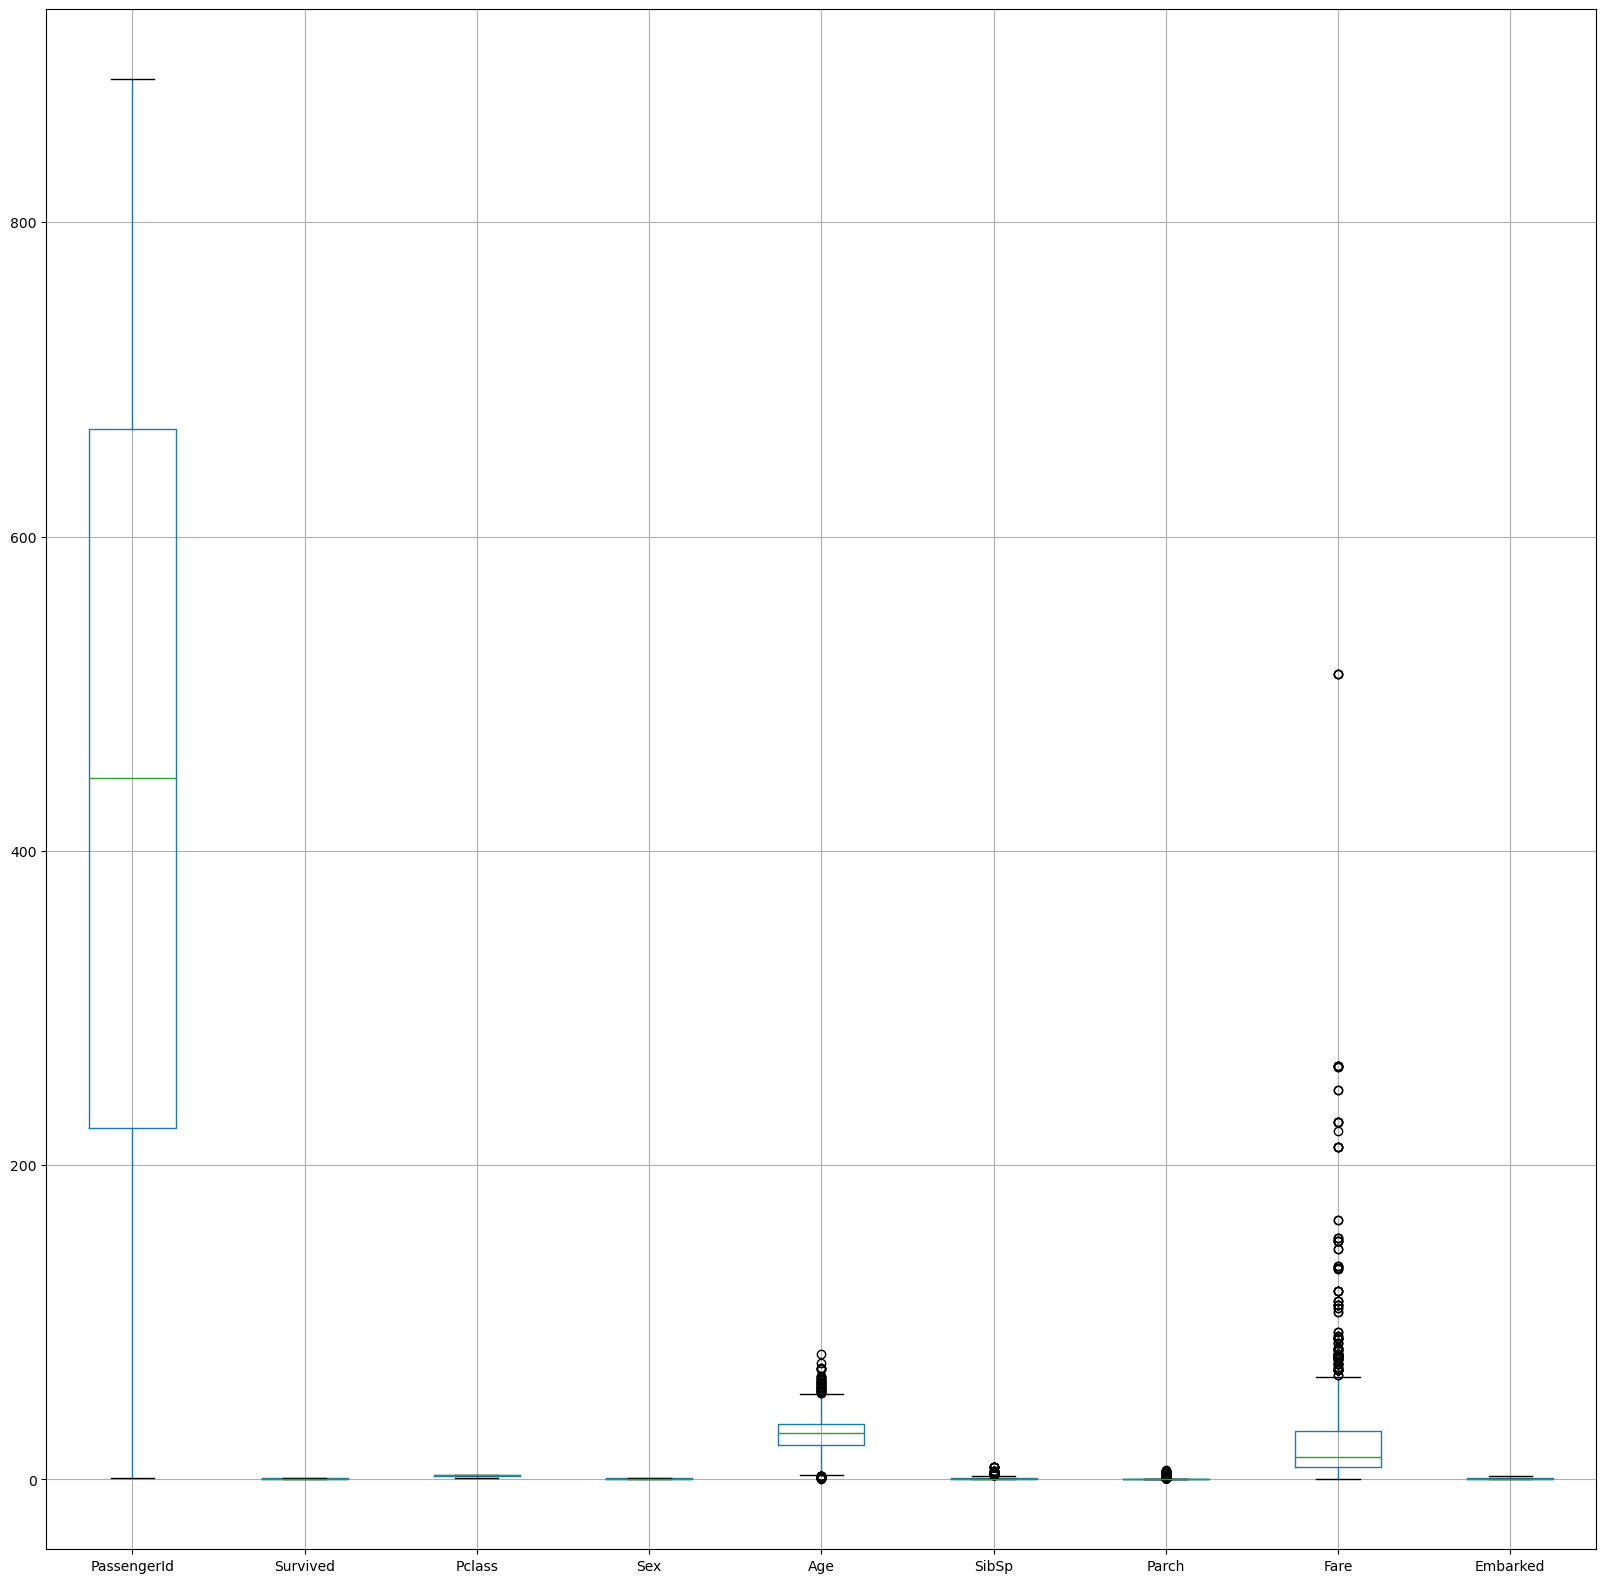

In [26]:
titanic.boxplot(figsize=(20,20))

In [27]:




Q1 = titanic.quantile(0.25)
Q3 = titanic.quantile(0.75)

#Calculate the IQR
IQR = Q3-Q1

#Define the outlier boundaries
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

#Create a mask for data within the IQR boundaries
mask = ~((titanic < lower_bound) | (titanic > upper_bound)).any(axis=1)

#Remove outliers
cleaned_data = titanic[mask]

<Axes: >

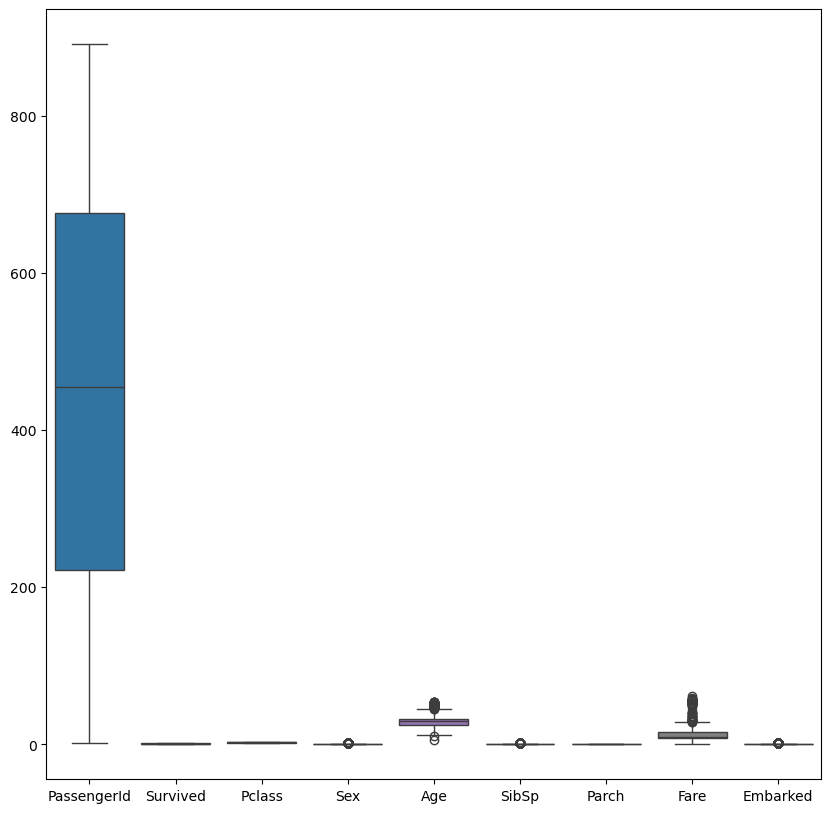

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(cleaned_data, ax=ax)

In [29]:
correlation = titanic.corr()
correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

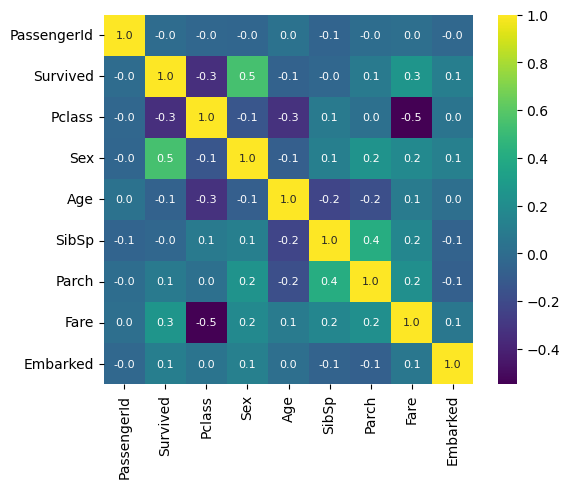

In [30]:
sns.heatmap(correlation, cbar= True, annot= True, annot_kws= {'size': 8}, fmt = '.1f', cmap='viridis', square = True)

In [31]:
cleaned_data=cleaned_data.drop('PassengerId', axis=1)

In [32]:
x = cleaned_data.drop('Survived', axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
5,3,0,29.699118,0,0,8.4583,2.0
...,...,...,...,...,...,...,...
884,3,0,25.000000,0,0,7.0500,0.0
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [33]:
y= cleaned_data['Survived']
y

0      0
2      1
3      1
4      0
5      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=2)

In [35]:
x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape

((577, 7), (461, 7), (116, 7), (577,), (461,), (116,))

In [36]:
model= RandomForestClassifier()

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
training_data_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(training_data_predict,y_train)
print('accuracy of training data:', training_data_accuracy)

accuracy of training data: 0.9718004338394793


In [39]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy= accuracy_score(testing_data_predict, y_test)
print('accuracy of tested data:', testing_data_accuracy)

accuracy of tested data: 0.8017241379310345


In [40]:
cm= confusion_matrix(testing_data_predict, y_test)

In [41]:
cm

array([[71,  9],
       [14, 22]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

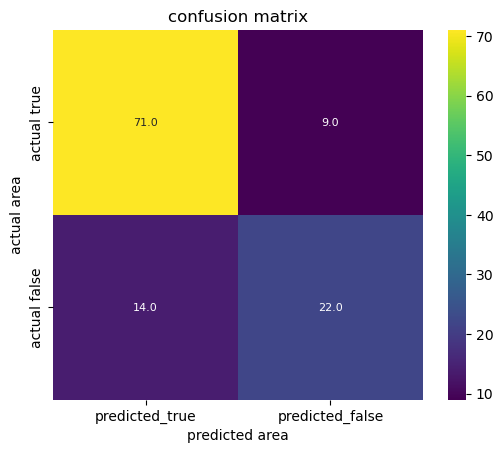

In [42]:
sns.heatmap(cm,cbar=True, annot= True, annot_kws={'size':8}, fmt='.1f', square=True, cmap='viridis',
            xticklabels=['predicted_true','predicted_false'],
            yticklabels=['actual true', 'actual false'])
plt.title('confusion matrix')
plt.xlabel('predicted area')
plt.ylabel('actual area')
plt.show

In [43]:
print(classification_report(testing_data_predict, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        80
           1       0.71      0.61      0.66        36

    accuracy                           0.80       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.80      0.80      0.80       116



In [93]:
new_data=(2,	0,	27.000000,	0,	0,	13.0000,	0.0)
new_data_as_np= np.asarray(new_data)
new_data_reshaped= new_data_as_np.reshape(1,-1)
prediction= model.predict(new_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')

0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [91]:
new_data=(3,	0,	35.000000,	0,	0,	8.0500,	0.0)
new_data_as_np= np.asarray(new_data)
new_data_reshaped= new_data_as_np.reshape(1,-1)
prediction= model.predict(new_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')

0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
